## Random Forest using Regression on Insurance Dataset to predict EMI Charges

In [9]:
import pandas as pd 

In [10]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [11]:
#Renaming Columns
df.columns = ['age', 'gender', 'bmi', 'children', 'smoker', 'region', 'emi_charges']

In [12]:
df.head()

,age,gender,bmi,children,smoker,region,emi_charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Step 1 (EDA - Exploratory Data Analysis)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          1338 non-null   int64  
 1   gender       1338 non-null   object 
 2   bmi          1338 non-null   float64
 3   children     1338 non-null   int64  
 4   smoker       1338 non-null   object 
 5   region       1338 non-null   object 
 6   emi_charges  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [15]:
df.isnull().sum()

age            0
gender         0
bmi            0
children       0
smoker         0
region         0
emi_charges    0
dtype: int64

In [16]:
df.duplicated().sum()

1

In [17]:
smoker = df[df['smoker'] == "yes"]
smoker['gender'].value_counts()

gender
male      159
female    115
Name: count, dtype: int64

In [18]:
fs = smoker[smoker['gender'] == 'female']

In [19]:
fs.head()

,age,gender,bmi,children,smoker,region,emi_charges
0,19,female,27.90,0,yes,southwest,16884.9240
11,62,female,26.29,0,yes,southeast,27808.7251
23,34,female,31.92,1,yes,northeast,37701.8768
58,53,female,22.88,1,yes,southeast,23244.7902
64,20,female,22.42,0,yes,northwest,14711.7438


In [20]:
fs['region'].value_counts()

region
southeast    36
northeast    29
northwest    29
southwest    21
Name: count, dtype: int64

In [21]:
df[df['smoker'] == 'yes']['emi_charges'].mean()

32050.23183153284

In [22]:
df[df['smoker'] == 'no']['emi_charges'].mean()

8434.268297856204

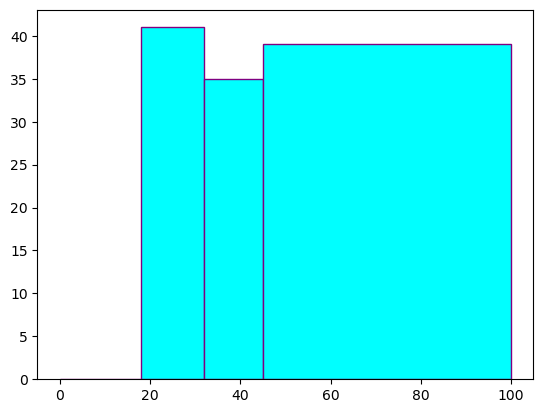

In [23]:
#Age of Smoker Girls 
import matplotlib.pyplot as plt
bin = [0,18,32,45,100]
plt.hist(fs['age'],color='cyan',ec='purple',bins=bin)
plt.show()

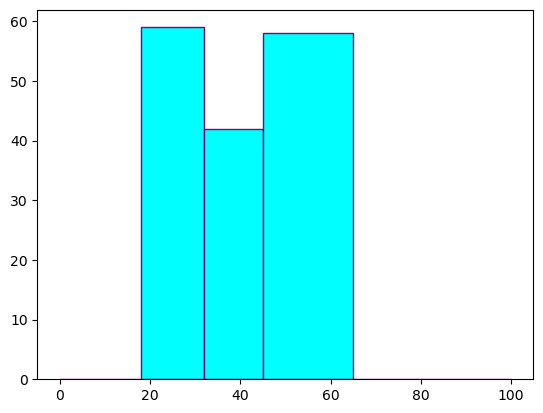

In [24]:
ms = smoker[smoker['gender'] == 'male']
bin = [0,18,32,45,65,100]
plt.hist(ms['age'],color='cyan',ec='purple',bins=bin)
plt.show()

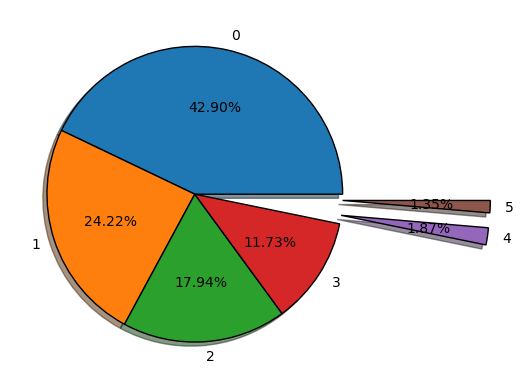

In [25]:
labels = [0,1,2,3,4,5]
values = list(df['children'].value_counts().values)
ls = [0,0,0,0,1,1]
plt.pie(values,labels=labels,autopct='%1.2f%%',wedgeprops = {'ec':'k'},explode=ls,shadow=True)
plt.show()

### Converting the Data into numerical Data

In [27]:
df.dtypes

age              int64
gender          object
bmi            float64
children         int64
smoker          object
region          object
emi_charges    float64
dtype: object

In [48]:
df2 = pd.get_dummies(df,drop_first="if_binary").astype('int')
df2.head()

,age,bmi,children,emi_charges,gender_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27,0,16884,0,1,0,0,1
1,18,33,1,1725,1,0,0,1,0
2,28,33,3,4449,1,0,0,1,0
3,33,22,0,21984,1,0,1,0,0
4,32,28,0,3866,1,0,1,0,0


### Splitting the data into dependent and Independent Variables

In [55]:
x = df2.drop('emi_charges',axis='columns')
y = df2[['emi_charges']]

In [60]:
from sklearn.model_selection import train_test_split

In [62]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

### Training the Model

In [65]:
from sklearn.ensemble import RandomForestRegressor

In [68]:
rfr = RandomForestRegressor()

In [72]:
rfr.fit(x_train,y_train)

C:\Users\Pranav\AppData\Local\Temp\ipykernel_4892\1947426121.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr.fit(x_train,y_train)


RandomForestRegressor()

### Evaluation of Model

In [75]:
rfr.score(x_train,y_train)

0.9725843306591068

In [77]:
rfr.score(x_test,y_test)

0.8870696939955965

In [79]:
#This model is also overfit as the testing score is also lower than training score

### Checking Predictions

In [84]:
pred_train = rfr.predict(x_train)
y_train['pred_emi_charges'] = pred_train
y_train

,emi_charges,pred_emi_charges
688,26236,21383.346667
487,1253,1614.630000
303,4349,4770.340000
423,2727,2706.400000
229,9225,10578.570000
...,...,...
350,11830,11967.640000
299,9249,9729.400000
952,4527,4793.000000
585,4779,4888.580000


In [86]:
pred_test = rfr.predict(x_test)
y_test['pred_emi_charges'] = pred_test
y_test

,emi_charges,pred_emi_charges
1203,9964,12099.50
316,8835,12342.71
758,5428,7255.22
825,16069,17773.06
995,7986,8108.10
...,...,...
670,4837,6004.49
25,14001,14831.41
804,1815,3421.21
1119,5693,5726.61


### Saving the Model

In [91]:
import joblib

In [93]:
joblib.dump(rfr,'random_forest_regression_insurance.lb')

['random_forest_regression_insurance.lb']